In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('data/covid_data.csv')

In [6]:
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
#df['DATE_DIED'] = df['DATE_DIED'].replace('9999-99-99',pd.NaT)

In [9]:
#df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'],errors='coerce')

In [3]:
df['COVID_RESULT'] = df['CLASIFFICATION_FINAL'].apply(lambda x : 1 if x in [1,2,3] else 0)

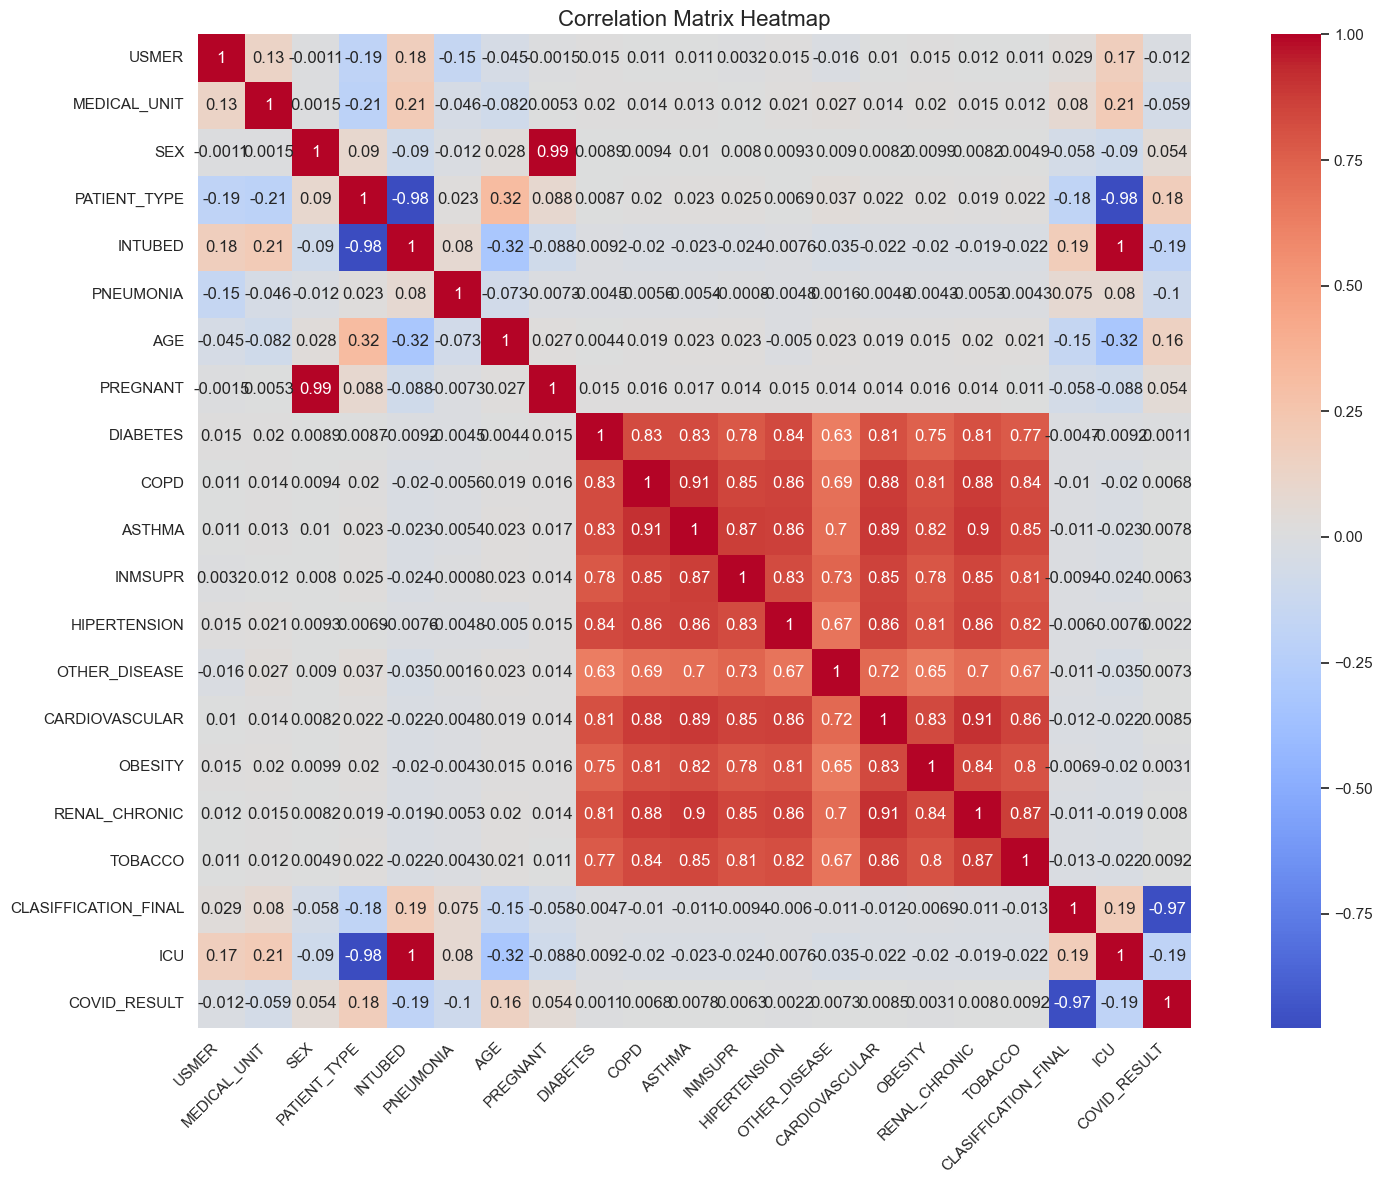

In [11]:
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()

# Plot heatmap directly (without manually creating plt.figure())
sns.set(style="white")  # optional styling
plt.figure(figsize=(17, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, cbar=True)

# Title and formatting
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [4]:
#Columns to dop due to their low correlation with the target
drops = [
    'PREGNANT',
    'OTHER_DISEASE',
    'TOBACCO',
    'USMER',
    'INMSUPR',
    'ASTHMA',
    'COPD',
    'OBESITY',
    'ICU',
    'CLASIFFICATION_FINAL',
    'DATE_DIED'
]
df=df.drop(columns = drops,axis=1)

In [13]:
df.columns

Index(['MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'AGE',
       'DIABETES', 'HIPERTENSION', 'CARDIOVASCULAR', 'RENAL_CHRONIC',
       'COVID_RESULT'],
      dtype='object')

In [14]:
df.head()

,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,DIABETES,HIPERTENSION,CARDIOVASCULAR,RENAL_CHRONIC,COVID_RESULT
0,1,1,1,97,1,65,2,1,2,2,1
1,1,2,1,97,1,72,2,1,2,1,0
2,1,2,2,1,2,55,1,2,2,2,1
3,1,1,1,97,2,53,2,2,2,2,0
4,1,2,1,97,2,68,1,1,2,2,1


In [5]:
# Model trainning 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



In [6]:
X = df.drop('COVID_RESULT',axis=1)
Y = df['COVID_RESULT']

Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2, random_state=25)

In [25]:
# Normalisation des données (utile pour certains modèles)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

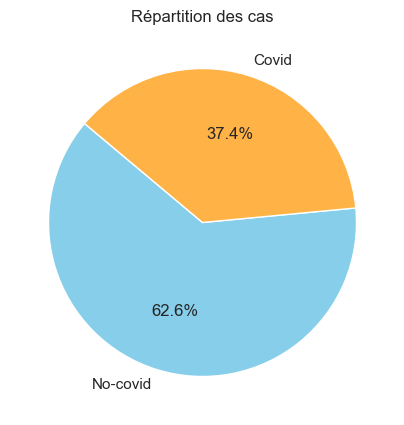

In [31]:
plt.figure(figsize=(5,5))
plt.pie( df['COVID_RESULT'].value_counts(), labels=['No-covid','Covid'], 
         autopct='%1.1f%%', startangle=140, colors=['skyblue', '#FFB347']
        )
plt.title('Répartition des cas', fontsize=12)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=300,criterion='entropy', random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# 🧪 Entraînement, prédiction et évaluation
for name, model in models.items():
    print(f"\n====== {name} ======")
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtest)

    print(f"Accuracy: {accuracy_score(Ytest, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(Ytest, y_pred))


====== Random Forest ======
Accuracy: 0.6609
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.90      0.77    131100
           1       0.61      0.26      0.36     78615

    accuracy                           0.66    209715
   macro avg       0.64      0.58      0.57    209715
weighted avg       0.65      0.66      0.62    209715


====== XGBoost ======


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:11:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6689
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77    131100
           1       0.64      0.27      0.38     78615

    accuracy                           0.67    209715
   macro avg       0.66      0.59      0.58    209715
weighted avg       0.66      0.67      0.63    209715


====== Logistic Regression ======
Accuracy: 0.6601
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.91      0.77    131100
           1       0.62      0.25      0.35     78615

    accuracy                           0.66    209715
   macro avg       0.64      0.58      0.56    209715
weighted avg       0.65      0.66      0.61    209715


====== MLP Classifier ======
Accuracy: 0.6676
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.90      0.77    131100
           1       0.63      0.28      0.38     7861

In [7]:
model = RandomForestClassifier(criterion = 'entropy', n_estimators=300, random_state=25)
model.fit(Xtrain.values,Ytrain.values)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=25)

In [9]:
# Ypred = model.predict(Xtest.values)
# print('Accuracy score is :',accuracy_score(Ytest,Ypred))
# print('Classification report',classification_report(Ytest,Ypred))
pred = model.predict([[1, 1, 1, 1, 1, 1, 1, 1,1,1]])
print(pred)

[0]
